In [1]:
import matplotlib.pyplot as plt 

from CCio import load_crystals_from_h5

from CCplot import plot1d
from CCplot import auto_plot_style

In [2]:
auto_plot_style()

In [3]:
def subtract_baseline(x):
    x = x.astype(float)
    return x - x[-20:].mean()

def load(filename):
    df = load_crystals_from_h5(filename)
    df = df.assign(bkgsub  = df.groupby("state").counts.apply(subtract_baseline))
    df = df.assign(dquanta = df.bkgsub / df.power)
    return df

In [4]:
nopaint = load("/home/gonzalo/data/CC/quartz_scan/nopaint.h5")
nopaint.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0        True        5        2          0        1000      0       2.0   
1        True        5        2          0        1000      0       2.0   
2        True        5        2          0        1000      0       2.0   
3        True        5        2          0        1000      0       2.0   
4        True        5        2          0        1000      0       2.0   

   ex_wl     power           timestamp  em_wl  counts   bkgsub       dquanta  
0  800.0  0.000001 2020-02-29 21:23:45  818.0    5318  2241.45  2.028756e+09  
1  800.0  0.000001 2020-02-29 21:23:45  818.5    5229  2152.45  1.948201e+09  
2  800.0  0.000001 2020-02-29 21:23:45  819.0    5136  2059.45  1.864026e+09  
3  800.0  0.000001 2020-02-29 21:23:45  819.5    4987  1910.45  1.729165e+09  
4  800.0  0.000001 2020-02-29 21:23:45  820.0    4838  1761.45  1.594304e+09

In [5]:
paint = load("/home/gonzalo/data/CC/quartz_scan/paint.h5")
paint.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0        True        5        2          0        1000      0       2.0   
1        True        5        2          0        1000      0       2.0   
2        True        5        2          0        1000      0       2.0   
3        True        5        2          0        1000      0       2.0   
4        True        5        2          0        1000      0       2.0   

   ex_wl     power           timestamp  em_wl  counts    bkgsub       dquanta  
0  800.0  0.000001 2020-02-29 22:10:45  818.0   17624  14538.55  1.319381e+10  
1  800.0  0.000001 2020-02-29 22:10:45  818.5   17041  13955.55  1.266473e+10  
2  800.0  0.000001 2020-02-29 22:10:45  819.0   15867  12781.55  1.159932e+10  
3  800.0  0.000001 2020-02-29 22:10:45  819.5   14424  11338.55  1.028979e+10  
4  800.0  0.000001 2020-02-29 22:10:45  820.0   12991   9905.55  8.989335e+09

In [6]:
paint2 = load("/home/gonzalo/data/CC/quartz_scan/paint2.h5")
paint2.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0        True        5        2          0        1000      0       2.0   
1        True        5        2          0        1000      0       2.0   
2        True        5        2          0        1000      0       2.0   
3        True        5        2          0        1000      0       2.0   
4        True        5        2          0        1000      0       2.0   

   ex_wl     power           timestamp  em_wl  counts   bkgsub       dquanta  
0  800.0  0.000001 2020-03-01 14:40:25  818.0   11545  8458.65  7.686340e+09  
1  800.0  0.000001 2020-03-01 14:40:25  818.5   10672  7585.65  6.893049e+09  
2  800.0  0.000001 2020-03-01 14:40:25  819.0    9772  6685.65  6.075223e+09  
3  800.0  0.000001 2020-03-01 14:40:25  819.5    8730  5643.65  5.128361e+09  
4  800.0  0.000001 2020-03-01 14:40:25  820.0    7777  4690.65  4.262374e+09

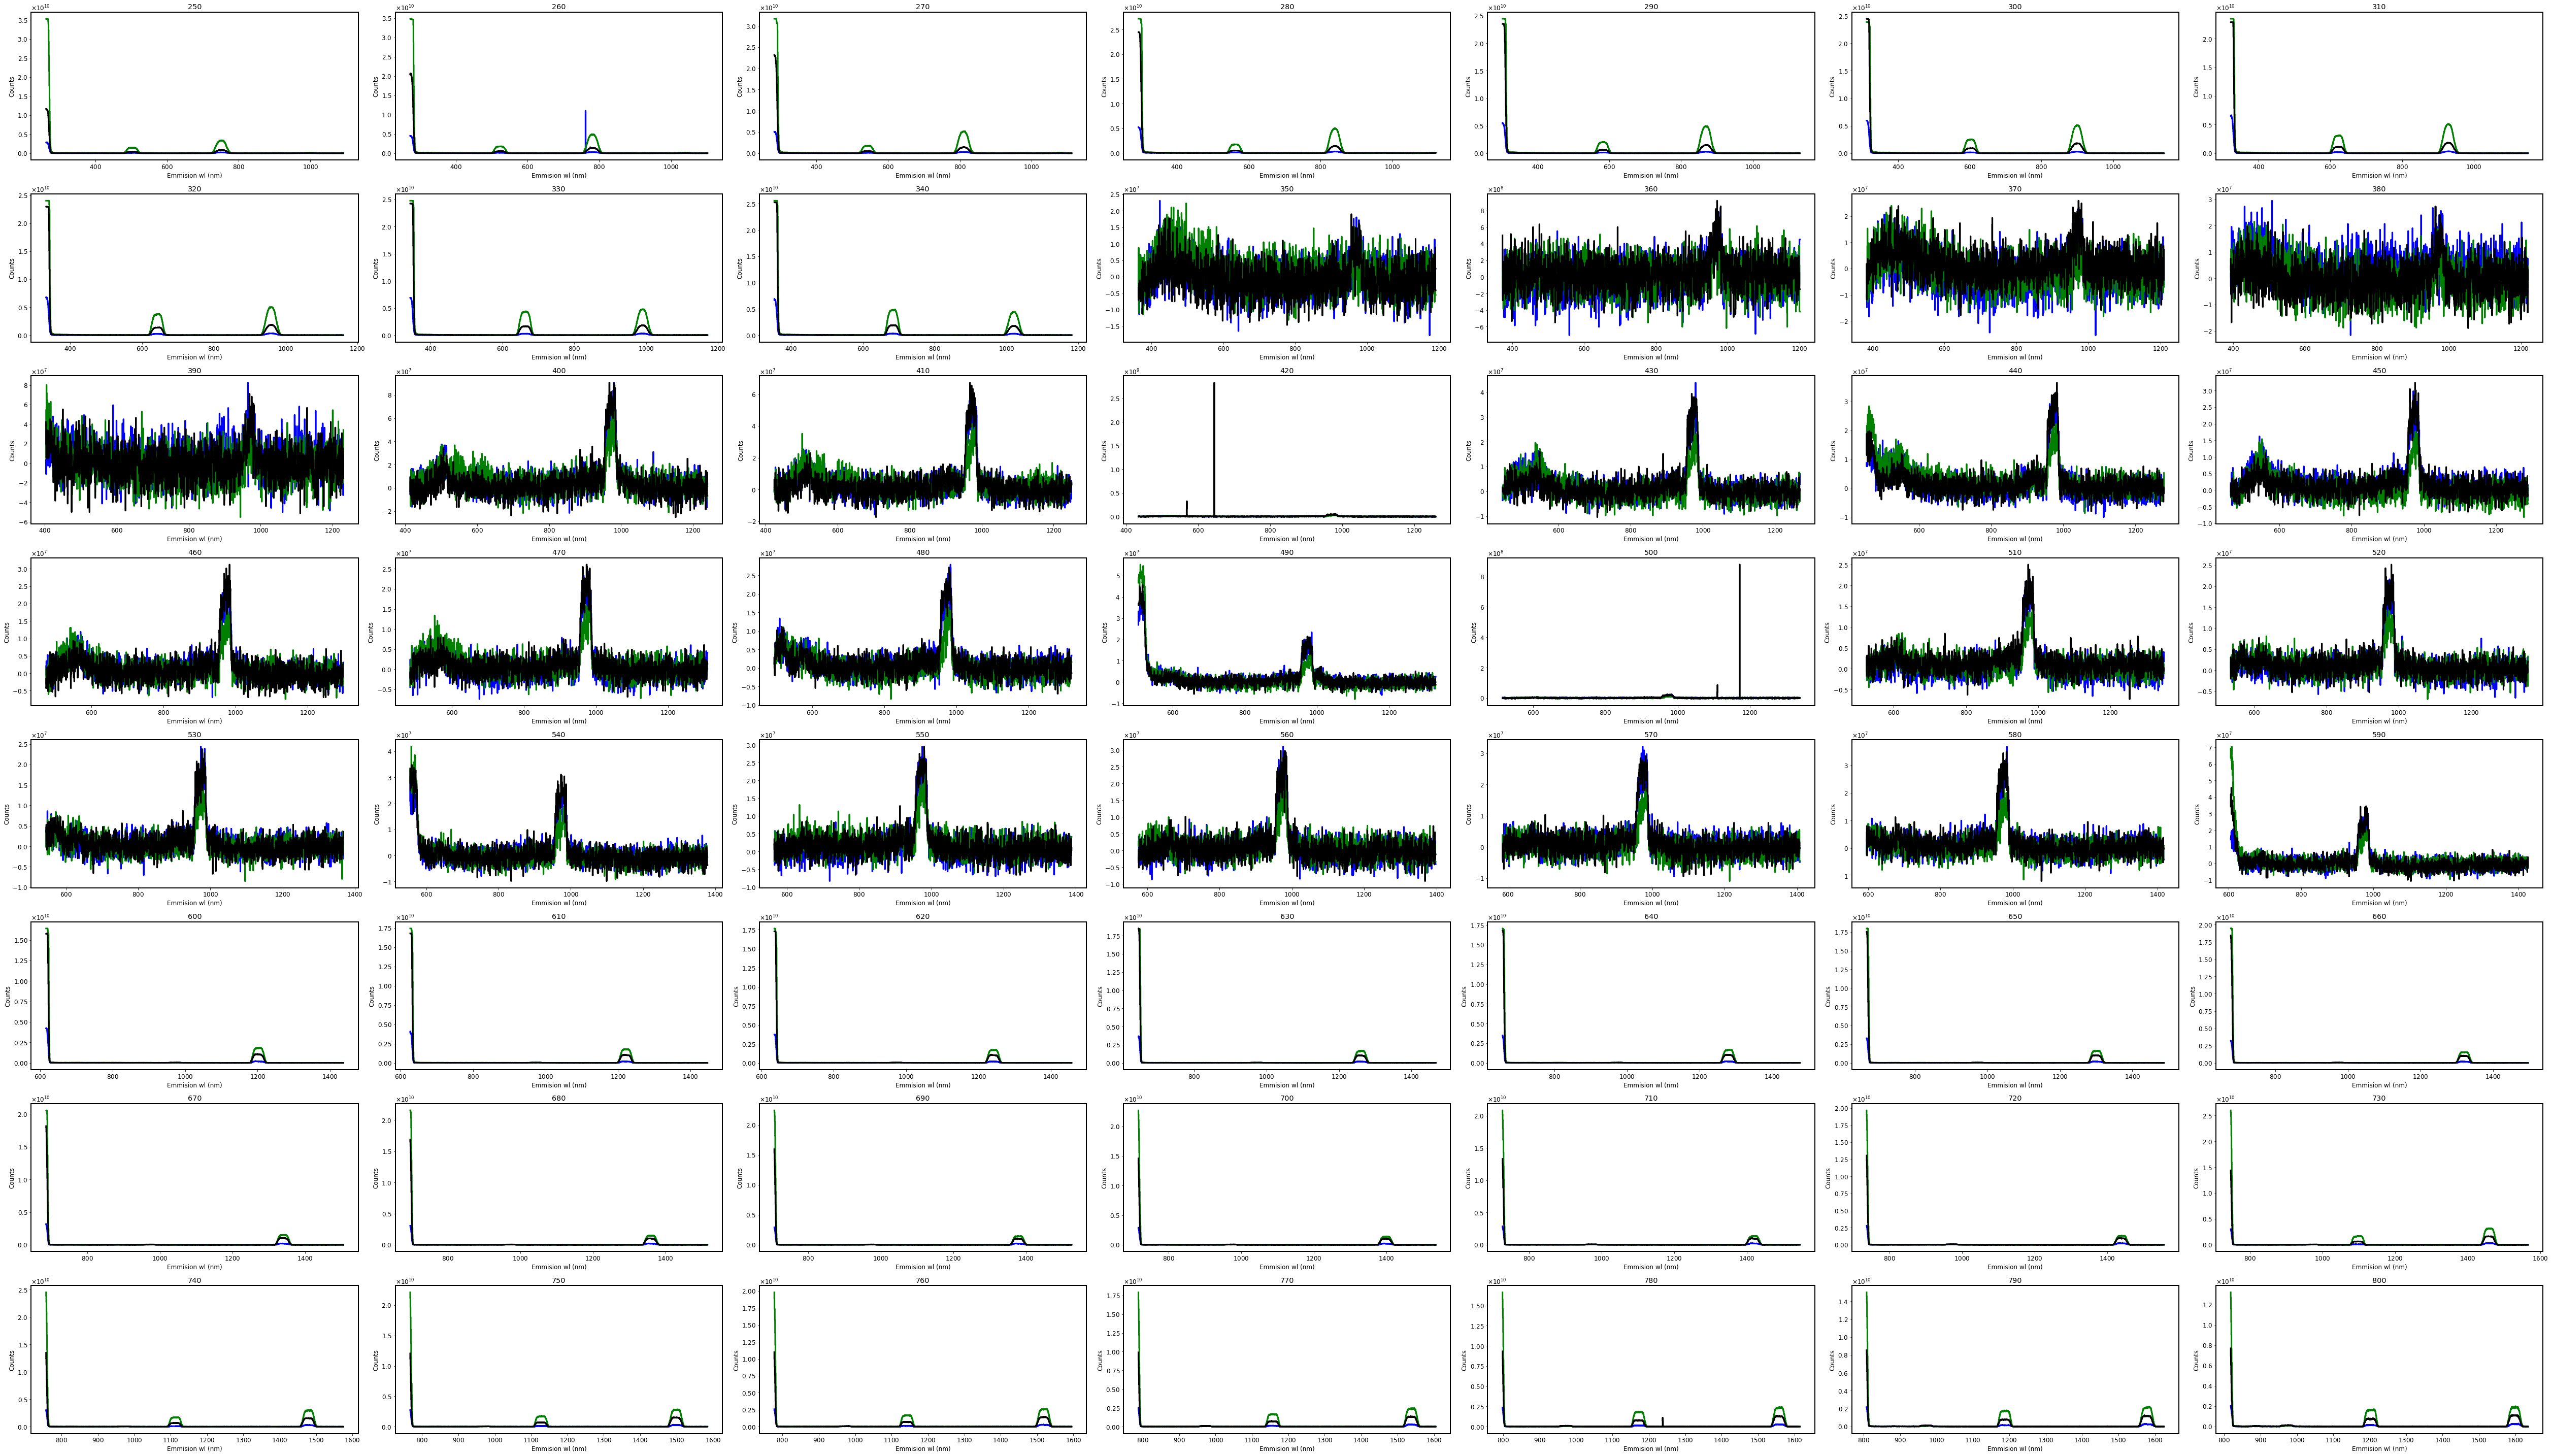

In [7]:
plt.figure(figsize=(10*7, 8*5))

nopaint_g = nopaint .groupby("ex_wl")
paint_g   =   paint .groupby("ex_wl")
paint2_g  =   paint2.groupby("ex_wl")

for exwl in range(250, 810, 10):
    n1 = nopaint_g .get_group(exwl)
    p1 =   paint_g .get_group(exwl)
    p2 =   paint2_g.get_group(exwl)

    plt.subplot(8, 7, (exwl - 250) // 10 + 1)
    plot1d(n1.em_wl, n1.dquanta, color="b")
    plot1d(p1.em_wl, p1.dquanta, color="g")
    plot1d(p2.em_wl, p2.dquanta, color="k", title=str(exwl))
    
plt.tight_layout()
plt.savefig("/home/gonzalo/Escritorio/p.pdf")